In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from score import collect_data, score
import os
from scipy import stats


# Plotting Functions

In [23]:
def compare_distributions(sets, variable, categories=["A","B"], save=True):
    """ Visualize and test if two distributions are significantly different
    
    Plots violin, box and histogram. Uses t test to compare.
    
    args:
        sets: list of two numpy arrays to compare
        variable: name of the variable under consideration e.g. pose_Rx
        categories: names of subsets of the variable under consideration e.g. [Correct, Incorrect]
    """
    title=f"Comparing Distributions of {variable}"
    max_category_text_size=22
    t, p = stats.ttest_ind(sets[0], sets[1])
     
    text=""
    if p/2 < .05:
        text = "\nDistributions PROBABLY SIGNIFICANTLY Different"
        title = "*"+title+"*"  
    
    text = text+f"\nt-value = {t:.04f} \np-value = {p/2:.04f}"

    categories = [c[:max_category_text_size] for c in categories]
    for i in range(len(categories)):
        text = text + f"\nMean of {categories[i]}: {np.mean(sets[i]):.04f}"
        text = text + f"\nStandard Deviation of  {categories[i]}: {np.std(sets[i]):.04f}"
    text = text + f"\nEffect Size: {(np.mean(sets[1])-np.mean(sets[0]))/np.std(sets[0]):.04f}"
        
        
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

    axes[0].violinplot(sets,showmeans=False,showmedians=True)
    axes[0].set_title(title)

    axes[1].boxplot(sets)
    axes[1].set_title(title)

    axes[2].hist(sets, 40, density=False, histtype='bar', stacked=False, label=categories)
    axes[2].set_title(title)
    axes[2].legend(prop={'size': 10})
    axes[2].set_ylabel("samples")
    axes[2].set_xlabel(variable)

    # adding horizontal grid lines
    for ax in axes:
        ax.yaxis.grid(True)
        if ax != axes[2]:
            ax.set_xticks([y + 1 for y in range(len(sets))])
            ax.set_xlabel("")
            ax.set_ylabel(variable)
    axes[1].set_xlabel(text)
    
    plt.setp(axes[:2], xticks=[y + 1 for y in range(len(sets))],xticklabels=categories)
    plt.show()

# Load all Data

In [7]:
df_list = []
folders = os.listdir("data")
for folder in folders:
    if not os.path.isdir(os.path.join("data", folder)):
        continue
    df_list.append(pd.read_feather(f"data/{folder}/analysis_df_kalin.feather"))

# full_df = pd.read_feather("data/1l/analysis_df_.feather")
full_df = pd.concat(df_list)
print(full_df.shape)
print(full_df.columns)

pose = ["pose_Rx", "pose_Ry"]
original_conf = ["sConf","pConf"]
speech_conf = [c for c in full_df.columns if "-SPEECH" in c]
turn_conf = [c for c in full_df.columns if "-TURN" in c]
ang = ["p1_ang","p2_ang"]
at = ["p1_at","p2_at"]


# display(full_df)

(1474144, 42)
Index(['SPEECH-LABEL', 'TURN-LABEL', '1LAYER_SPEECH_TCN_SYNCNET-0Conf',
       '1LAYER_SPEECH_TCN_SYNCNET-1Conf', '1LAYER_TURN_TCN_SYNCNET-0Conf',
       '1LAYER_TURN_TCN_SYNCNET-1Conf', '1LAYER_SPEECH_TCN_PERFECTMATCH-0Conf',
       '1LAYER_SPEECH_TCN_PERFECTMATCH-1Conf',
       '1LAYER_TURN_TCN_PERFECTMATCH-0Conf',
       '1LAYER_TURN_TCN_PERFECTMATCH-1Conf',
       '1LAYER_SPEECH_BLSTM_SYNCNET-0Conf',
       '1LAYER_SPEECH_BLSTM_SYNCNET-1Conf', '1LAYER_TURN_BLSTM_SYNCNET-0Conf',
       '1LAYER_TURN_BLSTM_SYNCNET-1Conf',
       '1LAYER_SPEECH_BLSTM_PERFECTMATCH-0Conf',
       '1LAYER_SPEECH_BLSTM_PERFECTMATCH-1Conf',
       '1LAYER_TURN_BLSTM_PERFECTMATCH-0Conf',
       '1LAYER_TURN_BLSTM_PERFECTMATCH-1Conf',
       '2LAYER_SPEECH_TCN_SYNCNET-0Conf', '2LAYER_SPEECH_TCN_SYNCNET-1Conf',
       '2LAYER_TURN_TCN_SYNCNET-0Conf', '2LAYER_TURN_TCN_SYNCNET-1Conf',
       '2LAYER_SPEECH_TCN_PERFECTMATCH-0Conf',
       '2LAYER_SPEECH_TCN_PERFECTMATCH-1Conf',
       '2LAYER_TURN_T

/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


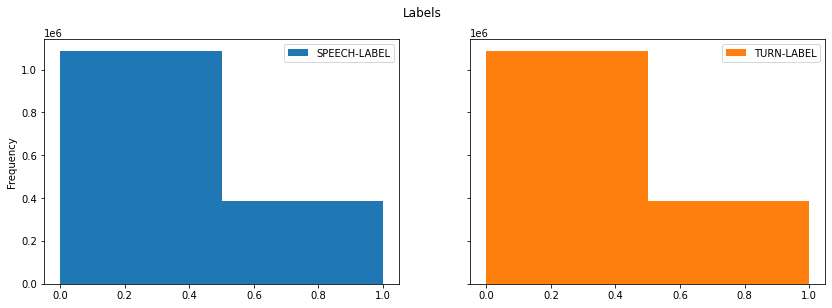

In [50]:
s=(14,4.5)
full_df[['SPEECH-LABEL', 'TURN-LABEL']].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Labels',bins=2, layout=[1,2],figsize=s)
plt.show()

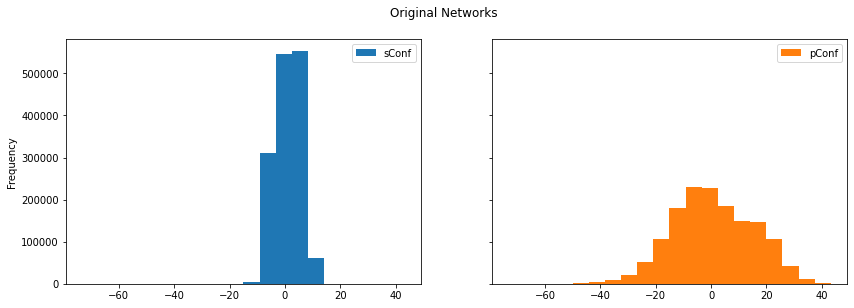

In [51]:
full_df[["sConf","pConf"]].plot(kind='hist',subplots=True,sharey=True,title=f'Original Networks',bins=20,layout=[1,2],figsize=s)
plt.show()

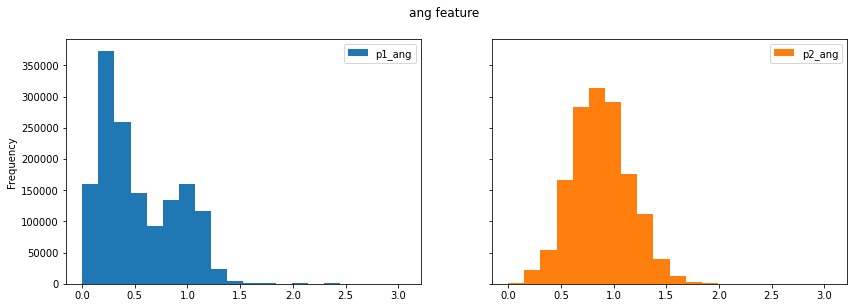

In [52]:
full_df[["p1_ang","p2_ang"]].plot(kind='hist',subplots=True,sharey=True,title=f'ang feature',bins=20,layout=[1,2],figsize=s)
plt.show()

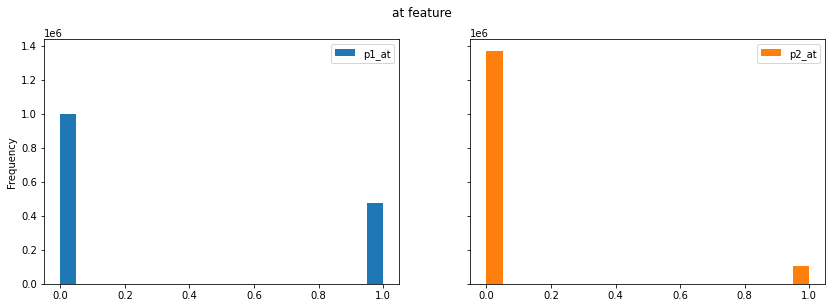

In [53]:
full_df[["p1_at","p2_at"]].plot(kind='hist',subplots=True,sharey=True,title=f'at feature',bins=20,layout=[1,2],figsize=s)
plt.show()

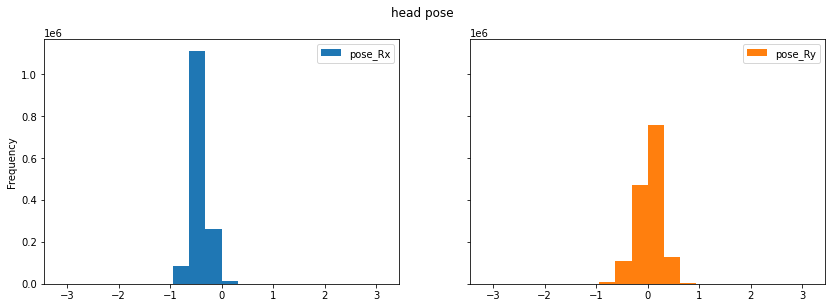

In [54]:
full_df[["pose_Rx","pose_Ry"]].plot(kind='hist',subplots=True,sharey=True,title=f'head pose',bins=20,layout=[1,2],figsize=s)
plt.show()

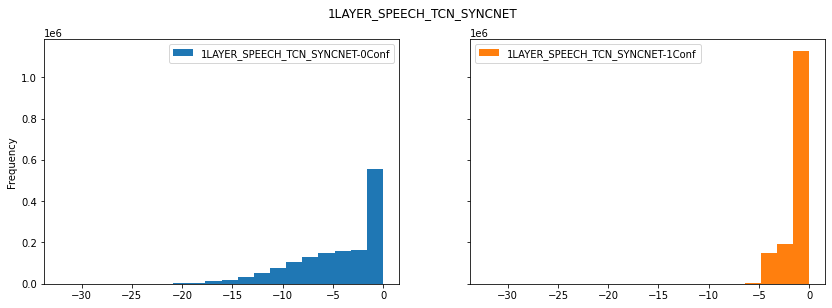

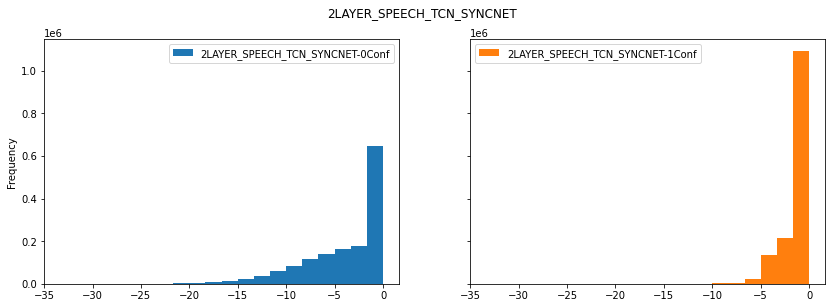

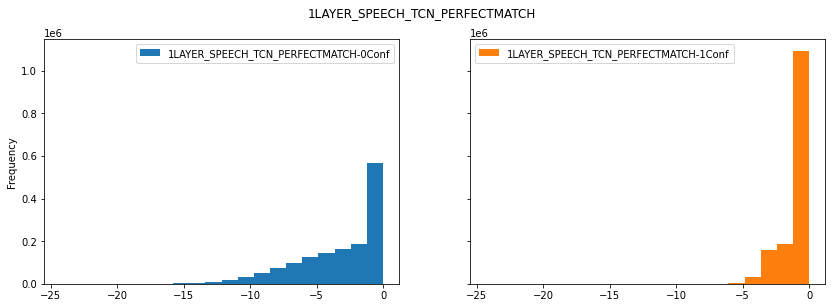

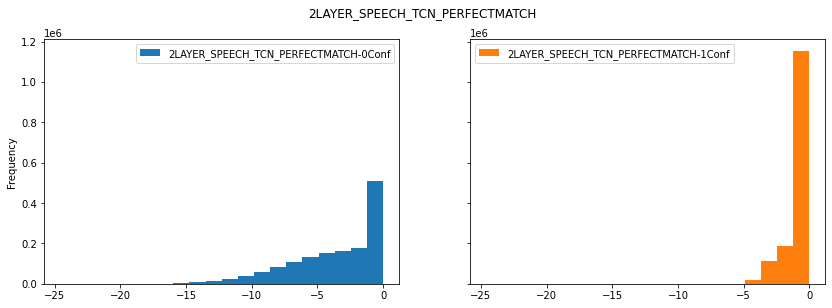

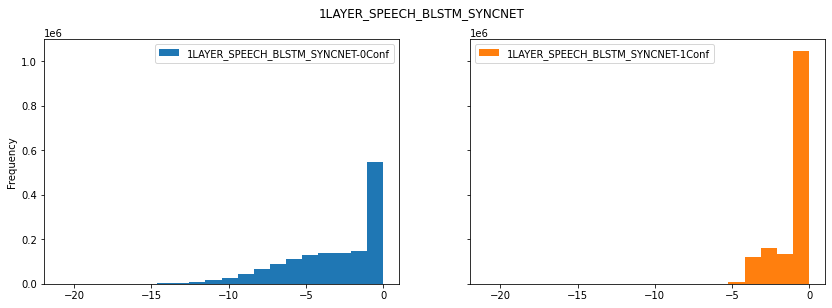

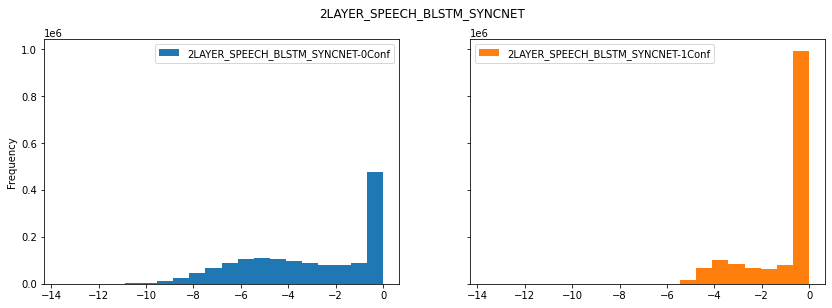

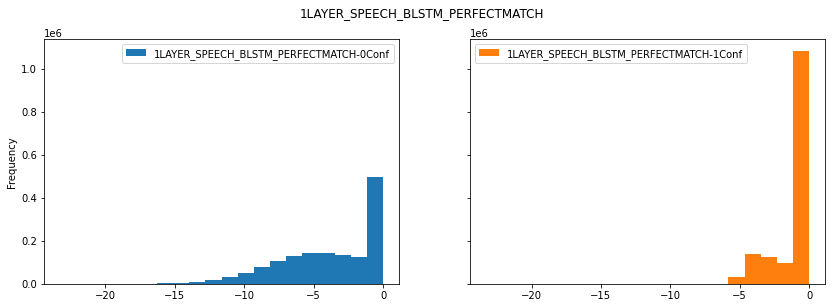

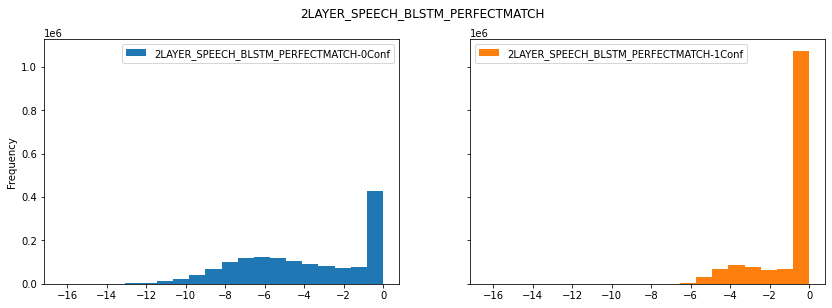

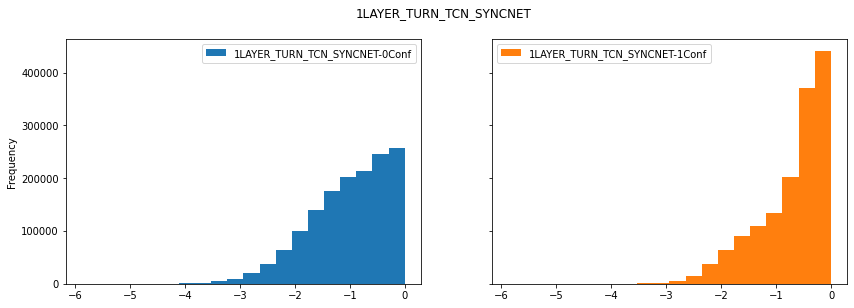

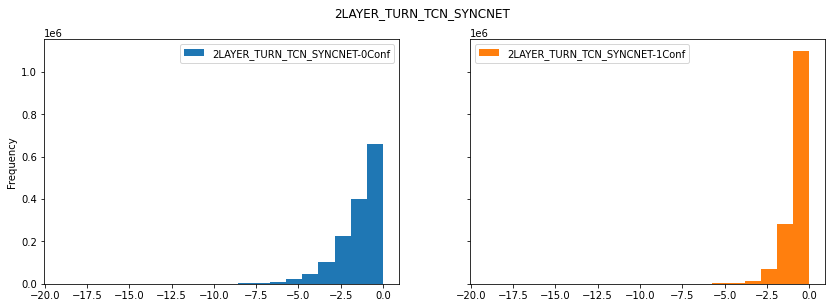

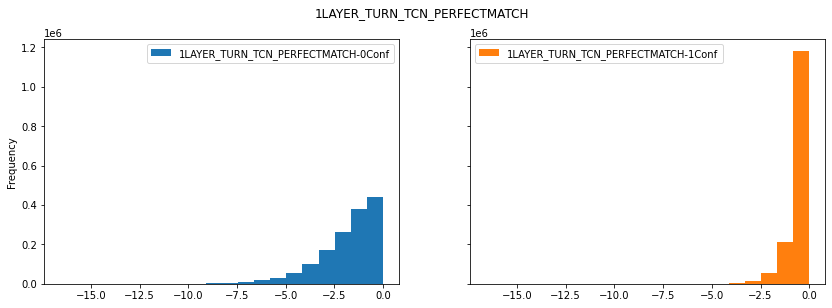

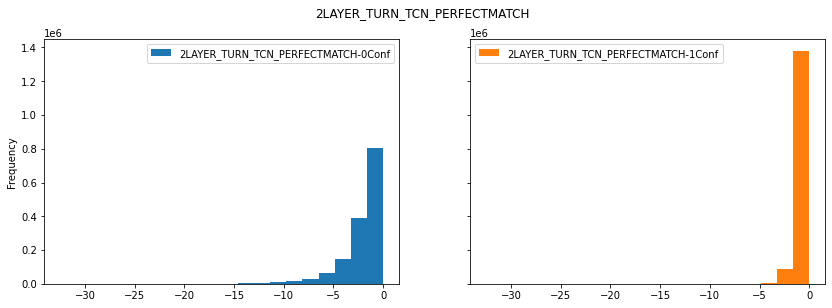

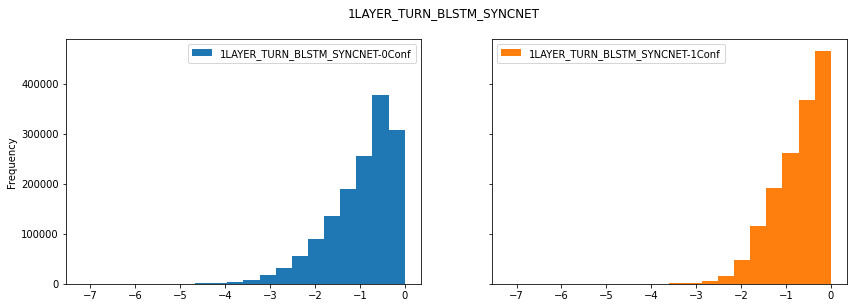

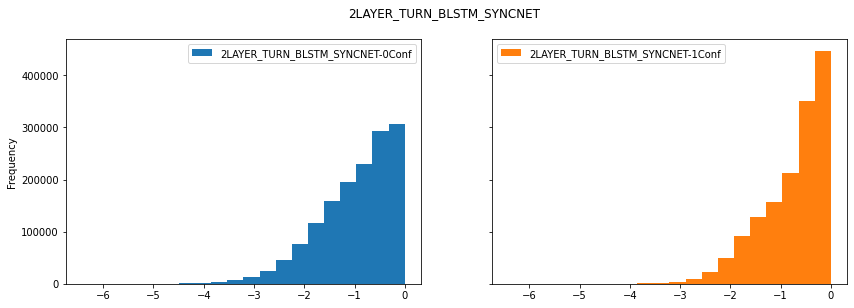

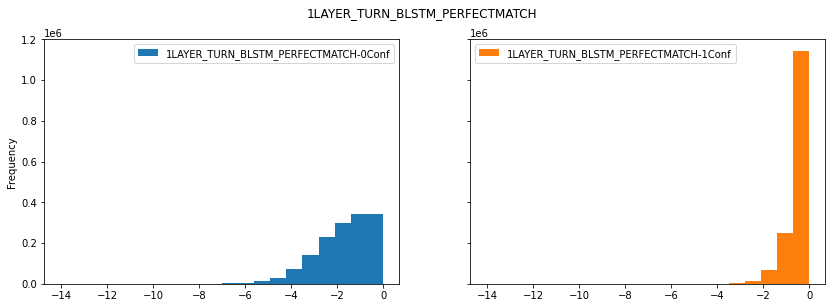

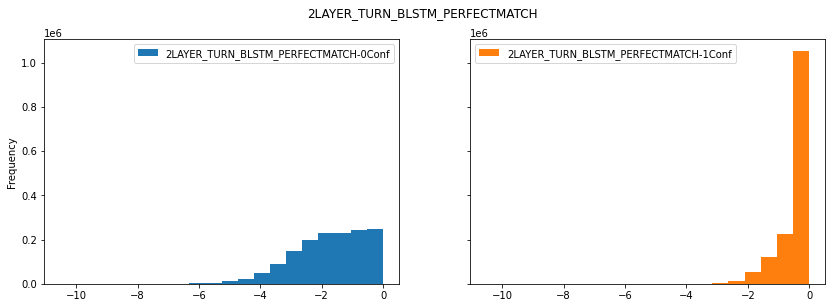

In [55]:
for l in ["SPEECH", "TURN"]:
    for m in ["TCN","BLSTM"]:
        for f in ["SYNCNET","PERFECTMATCH"]:
            for n in ["1LAYER","2LAYER"]:
                full_df[[f'{n}_{l}_{m}_{f}-0Conf', f'{n}_{l}_{m}_{f}-1Conf']].plot(kind='hist',subplots=True,sharey=True,title=f'{n}_{l}_{m}_{f}',bins=20,layout=[1,2],figsize=s) 
                plt.show()

# Score Data

In [84]:
def score_df(df, label="SPEECH",print_df=True, plot=False):
    #acc, f1, auroc, mAP = score(targets, outputs)
    scores = {}
    # Score original models
    for m in ["sConf","pConf"]:
        outputs1 = df[m].values
        outputs0 = -1* df[m].values
        outputs = np.array(list(zip(outputs0,outputs1)), dtype=object)

        acc, f1, auroc, mAP = score(df[f"{label}-LABEL"].values, outputs)
        scores[m] = {"acc":acc,"f1":f1,"auROC":auroc,"mAP":mAP}
        
    # Score Gaze Features
    outputs1 = (df["p1_ang"].values + df["p1_ang"].values)/2
    outputs0 = 1-outputs1
    outputs = np.array(list(zip(outputs0,outputs1)), dtype=object)

    acc, f1, auroc, mAP = score(df[f"{label}-LABEL"].values, outputs)
    scores[f'ang'] = {"acc":acc,"f1":f1,"auROC":auroc,"mAP":mAP}
    
    outputs1 = (df["p1_at"].values + df["p1_at"].values)/2
    outputs0 = 1-outputs1
    outputs = np.array(list(zip(outputs0,outputs1)), dtype=object)

    acc, f1, auroc, mAP = score(df[f"{label}-LABEL"].values, outputs)
    scores[f'at'] = {"acc":acc,"f1":f1,"auROC":auroc,"mAP":mAP}
    
    # Score newly trained models
    for m in ["TCN","BLSTM"]:
        for f in ["SYNCNET","PERFECTMATCH"]:
            for n in ["1LAYER","2LAYER"]:
                outputs0 = df[f'{n}_{label}_{m}_{f}-0Conf'].values
                outputs1 = df[f'{n}_{label}_{m}_{f}-1Conf'].values
                outputs = np.array(list(zip(outputs0,outputs1)), dtype=object)

                acc, f1, auroc, mAP = score(df[f"{label}-LABEL"].values, outputs)
                scores[f'{n}_{m}_{f}'] = {"acc":acc,"f1":f1,"auROC":auroc,"mAP":mAP}
    df = pd.DataFrame(scores)
    if print_df:
        print(df)
    if plot:
        df.transpose().plot(kind='bar',title=f'Performance on {label}',figsize=(20,6),rot=25)
        plt.show()
    
    return scores


          sConf     pConf       ang        at  1LAYER_TCN_SYNCNET  \
acc    0.624708  0.732300  0.488647  0.624891            0.469180   
f1     0.554743  0.648691  0.262585  0.360073            0.447648   
auROC  0.694478  0.920787  0.389279  0.553144            0.647228   
mAP    0.614832  0.889063  0.439902  0.523488            0.605838   

       2LAYER_TCN_SYNCNET  1LAYER_TCN_PERFECTMATCH  2LAYER_TCN_PERFECTMATCH  \
acc              0.504515                 0.483919                 0.469629   
f1               0.458138                 0.453021                 0.459662   
auROC            0.656200                 0.661297                 0.674330   
mAP              0.608242                 0.623778                 0.631944   

       1LAYER_BLSTM_SYNCNET  2LAYER_BLSTM_SYNCNET  1LAYER_BLSTM_PERFECTMATCH  \
acc                0.491436              0.481114                   0.464514   
f1                 0.455124              0.446923                   0.444026   
auROC             

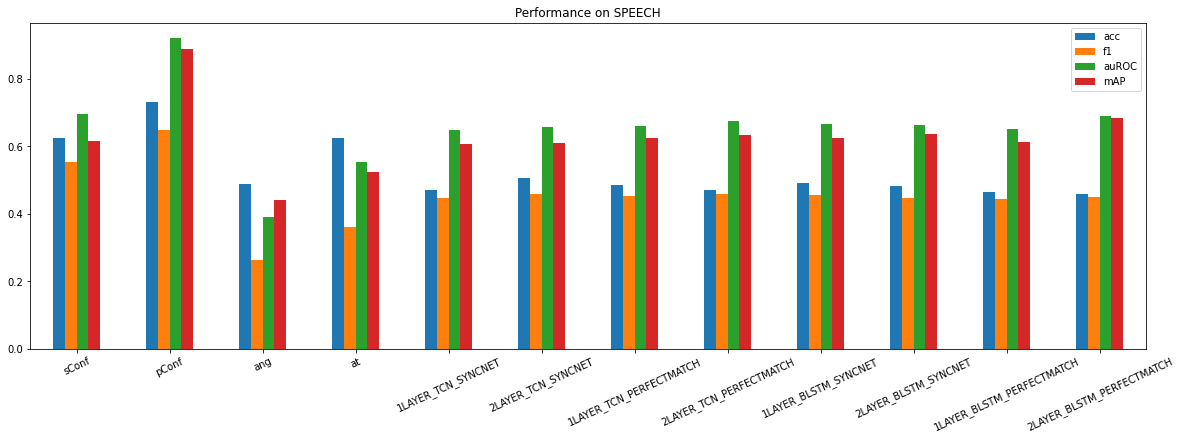

In [72]:
s = score_df(full_df, label="SPEECH",print_df=True,plot=True)
    

          sConf     pConf       ang        at  1LAYER_TCN_SYNCNET  \
acc    0.622709  0.719040  0.489492  0.623952            0.541725   
f1     0.552384  0.631300  0.263828  0.358497            0.473103   
auROC  0.699641  0.896512  0.392101  0.551939            0.702537   
mAP    0.618545  0.856509  0.441136  0.522892            0.656217   

       2LAYER_TCN_SYNCNET  1LAYER_TCN_PERFECTMATCH  2LAYER_TCN_PERFECTMATCH  \
acc              0.488793                 0.442152                 0.439264   
f1               0.439502                 0.450994                 0.446292   
auROC            0.603382                 0.654949                 0.628366   
mAP              0.565026                 0.607888                 0.582724   

       1LAYER_BLSTM_SYNCNET  2LAYER_BLSTM_SYNCNET  1LAYER_BLSTM_PERFECTMATCH  \
acc                0.539278              0.541650                   0.432068   
f1                 0.433484              0.447358                   0.451150   
auROC             

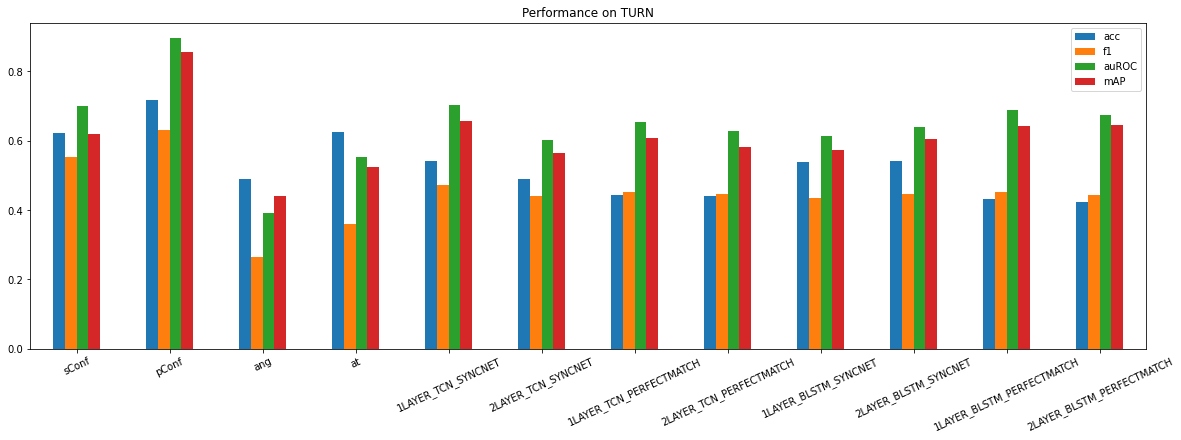

In [71]:
s = score_df(full_df, label="TURN",print_df=True,plot=True)


# Comparing Headpose When Models are Correct vs Incorrect

Here we can see that when the models are wrong the headpose tends to be different from when the models are right

In [78]:
def compare_correct_incorrect(plotcolumns, numlayers, model, feature, labeltype):
    print("Correct vs Incorrect When Talking")
    cond1A = full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-1Conf"] >= full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-0Conf"] #TCN thinks speaking
    cond1B = full_df[f"{labeltype}-LABEL"] == 1
    df1 = full_df[plotcolumns][cond1A & cond1B] #correct

    cond2A = full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-1Conf"] < full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-0Conf"] #TCN thinks not speaking
    cond2B = full_df["SPEECH-LABEL"] == 1
    df2 = full_df[plotcolumns][cond2A & cond2B] # incorrect

    data_to_compare = [df1,df2]
    for c in plotcolumns:
        sets = [df[c].values for df in data_to_compare]
        compare_distributions(sets, c, categories=["Correct","Incorrect"], save=False)
        
    print("Correct vs Incorrect When NOT Talking")
    cond1A = full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-1Conf"] < full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-0Conf"] #TCN thinks not speaking
    cond1B = full_df[f"{labeltype}-LABEL"] == 0
    df1 = full_df[plotcolumns][cond1A & cond1B] #correct

    cond2A = full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-1Conf"] >= full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-0Conf"] #TCN thinks speaking
    cond2B = full_df["SPEECH-LABEL"] == 0
    df2 = full_df[plotcolumns][cond2A & cond2B] # incorrect

    data_to_compare = [df2,df1]
    for c in plotcolumns:
        sets = [df[c].values for df in data_to_compare]
        compare_distributions(sets, c, categories=["Correct","Incorrect"], save=False)
        
def compare_correct_incorrect_original(columns, feature, labeltype):
    print("Correct vs Incorrect When Talking")
    cond1A = full_df[feature] >= 0 #Sync thinks speaking
    cond1B = full_df[f"{labeltype}-LABEL"] == 1
    df1 = full_df[columns][cond1A & cond1B] #Correct

    cond2A = full_df[feature] < 0 #Sync thinks not speaking
    cond2B = full_df[f"{labeltype}-LABEL"] == 1
    df2 = full_df[columns][cond2A & cond2B] #Incorrect
    
    print("Comparing head rotation and syncnet performance while talking")
    data_to_compare = [df1,df2]
    for c in columns:
        sets = [df[c].values for df in data_to_compare]
        compare_distributions(sets, c, categories=["Correct","Incorrect"], save=False)

    print("Correct vs Incorrect When NOT Talking")
    cond1A = full_df[feature] < 0 #Sync thinks not speaking
    cond1B = full_df[f"{labeltype}-LABEL"] == 0
    df1 = full_df[columns][cond1A & cond1B] #Correct

    cond2A = full_df[feature] >= 0 #Sync thinks speaking
    cond2B = full_df[f"{labeltype}-LABEL"] == 0
    df2 = full_df[columns][cond2A & cond2B] #Incorrect
    
    print("Comparing head rotation and syncnet performance while NOT talking")
    data_to_compare = [df1,df2]
    for c in columns:
        sets = [df[c].values for df in data_to_compare]
        compare_distributions(sets, c, categories=["Correct","Incorrect"], save=False)

Correct vs Incorrect When Talking


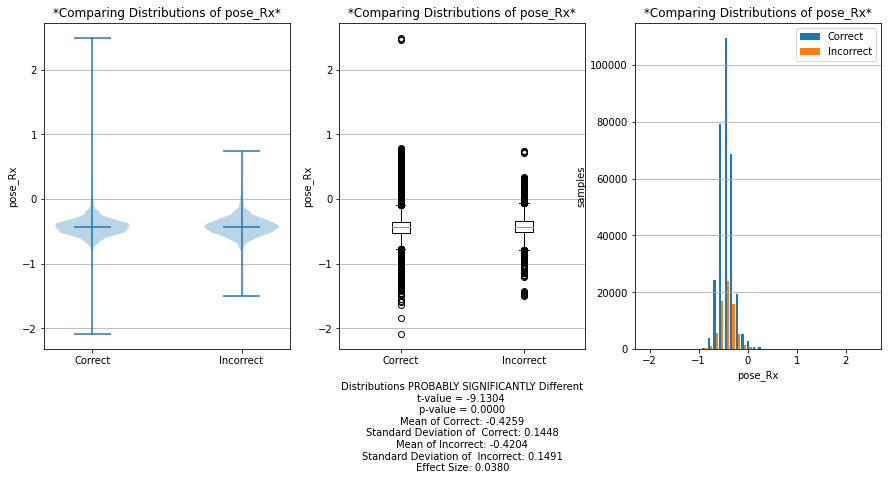

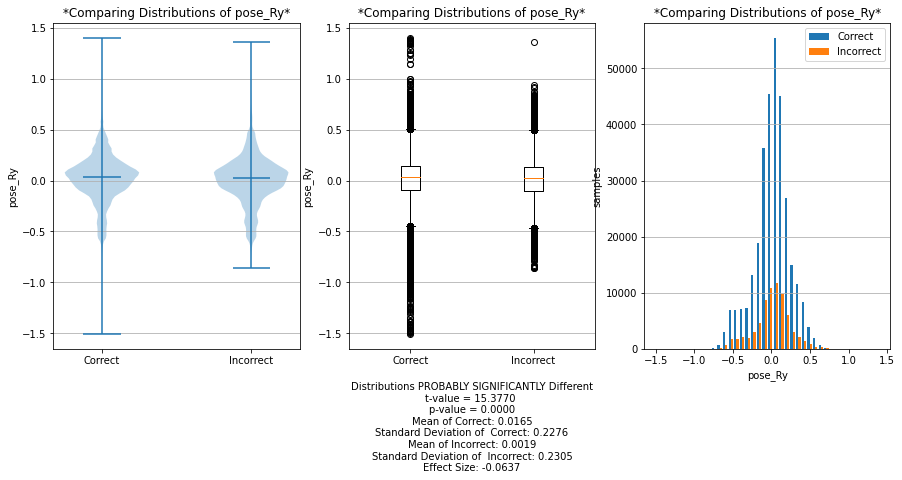

Correct vs Incorrect When NOT Talking


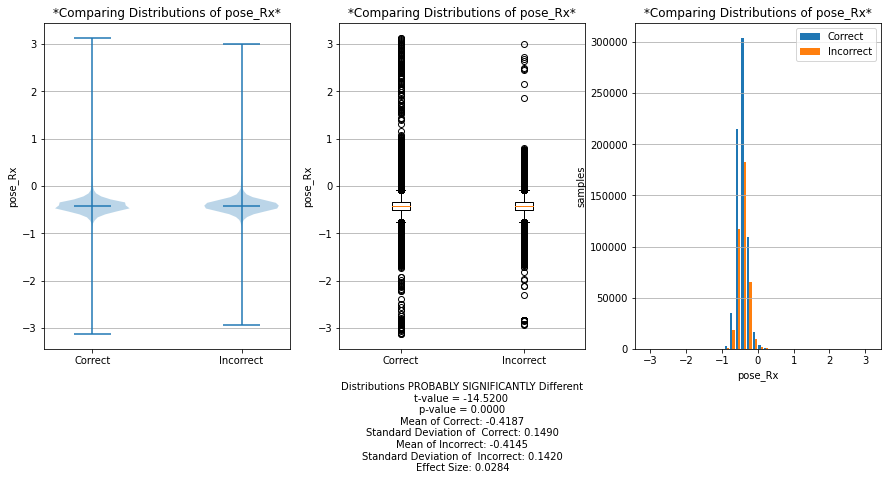

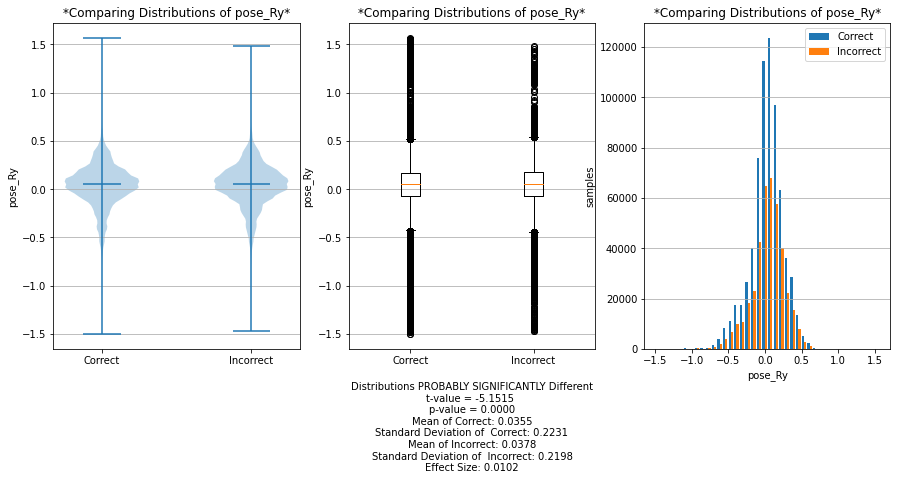

In [76]:
columns = pose
compare_correct_incorrect(pose, 1, "TCN", "PERFECTMATCH", "SPEECH")


Correct vs Incorrect When Talking
Comparing head rotation and syncnet performance while talking


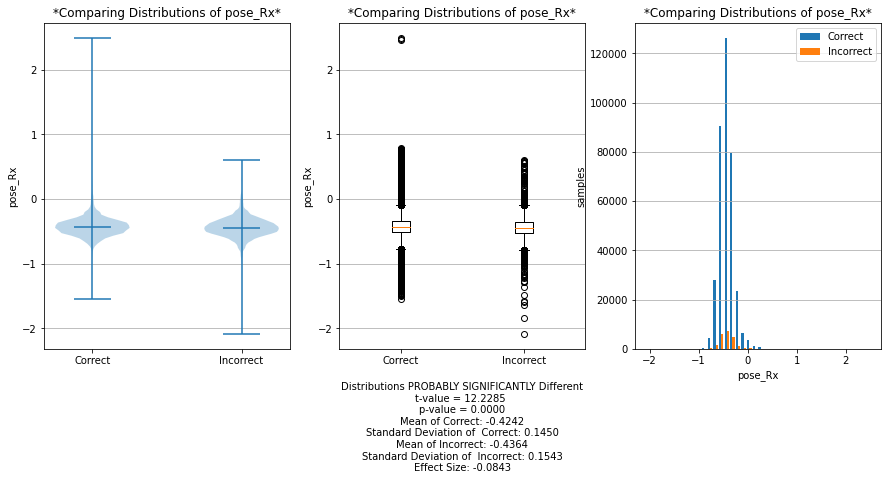

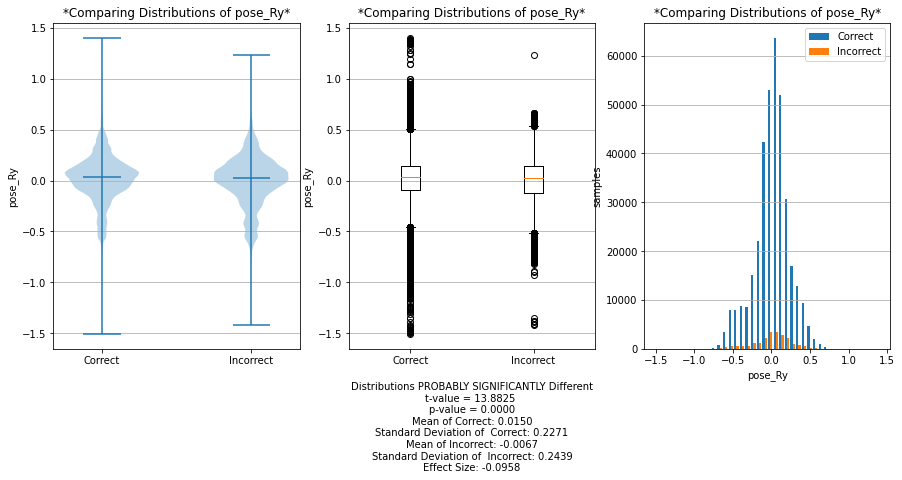

Correct vs Incorrect When NOT Talking
Comparing head rotation and syncnet performance while NOT talking


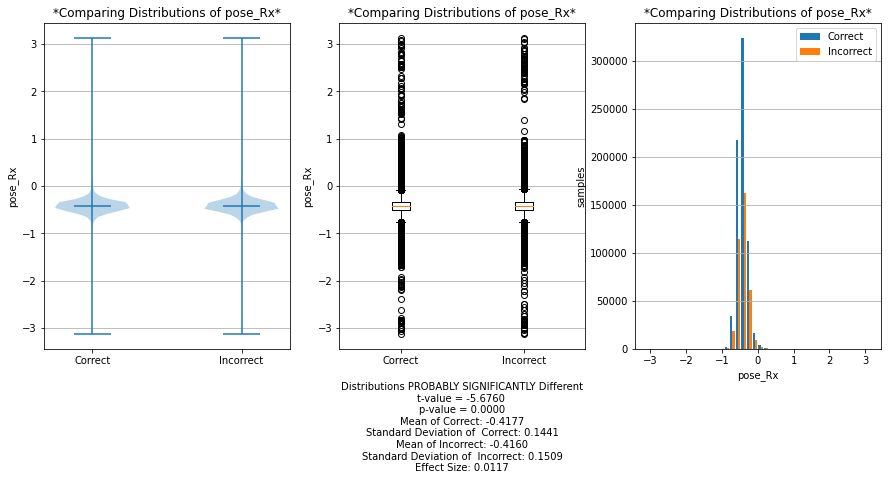

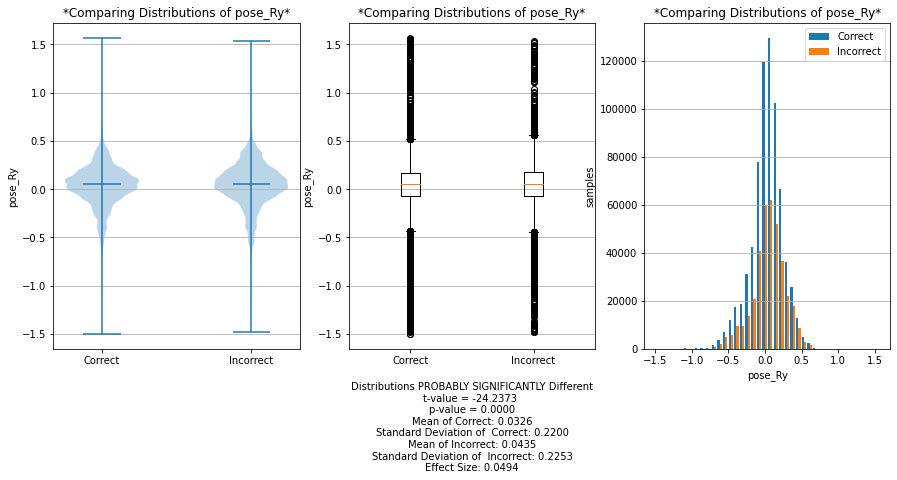

In [81]:
compare_correct_incorrect_original(pose, "pConf", "SPEECH")

# Calculating model performance for different head rotations

pose_Rx range -3.133 3.136
Range is -3.133, -1.879 and support is 94


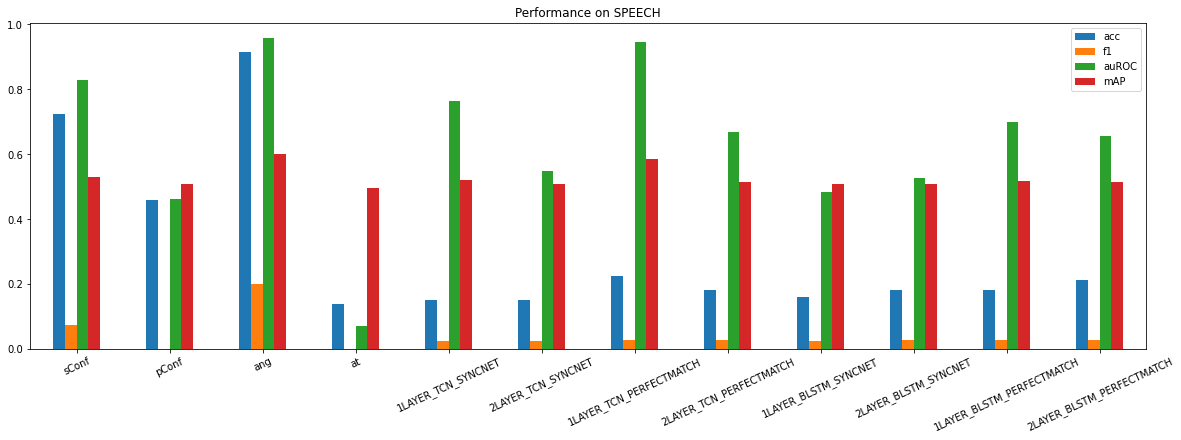

Range is -1.879, -0.625 and support is 84334


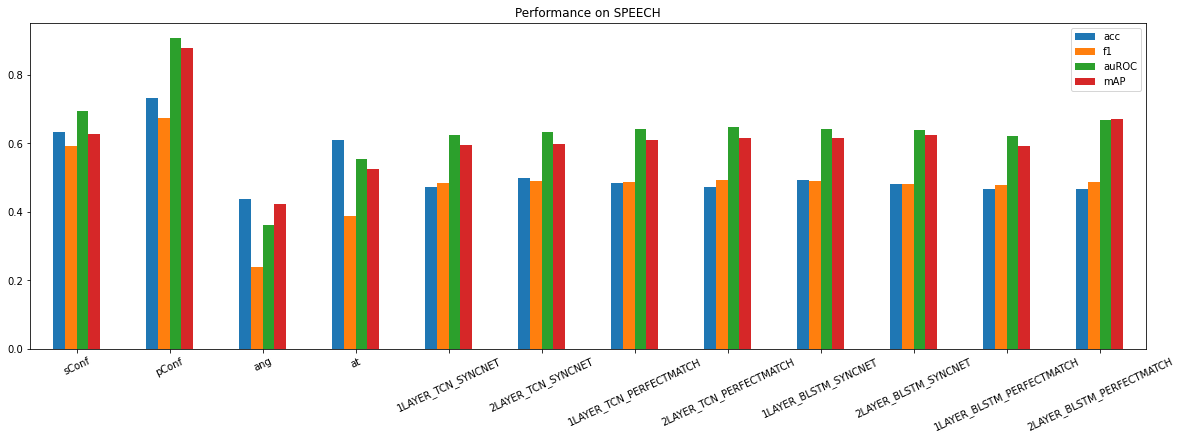

Range is -0.625, 0.628 and support is 1389402


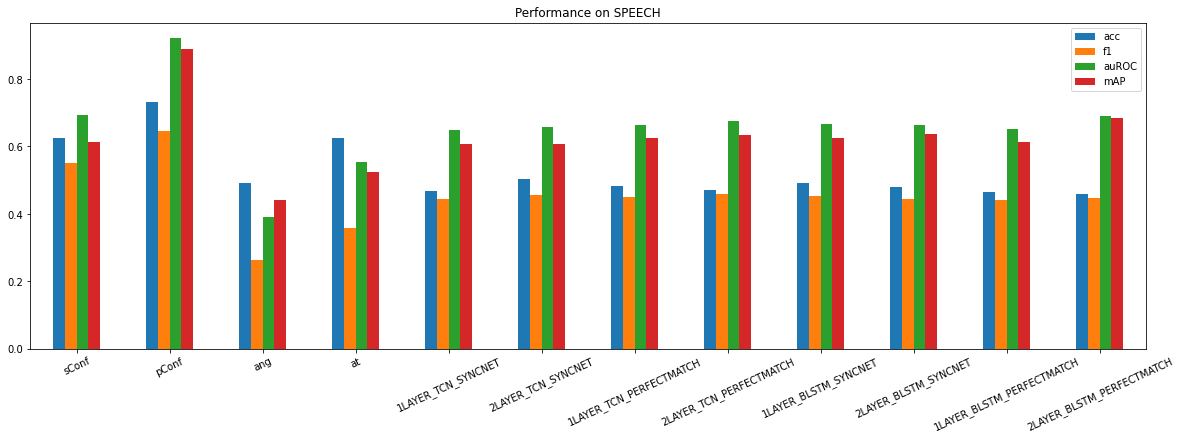

Range is 0.628, 1.882 and support is 209


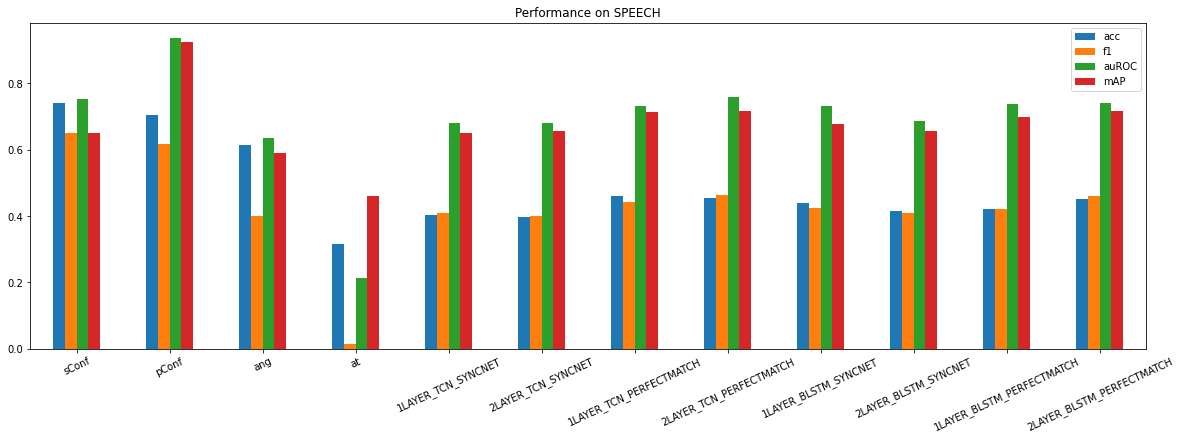

Range is 1.882, 3.136 and support is 104


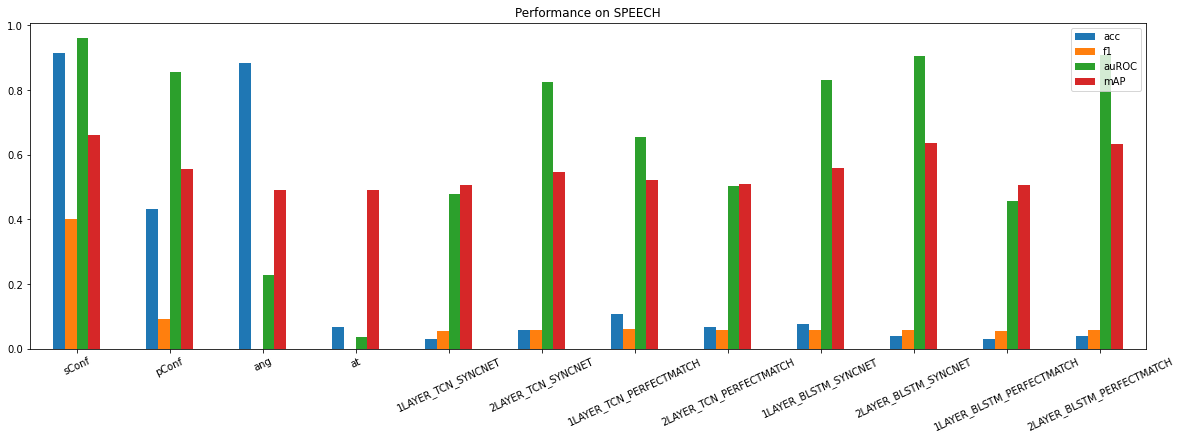

pose_Ry range -1.509 1.569
Range is -1.509, -0.893 and support is 1547


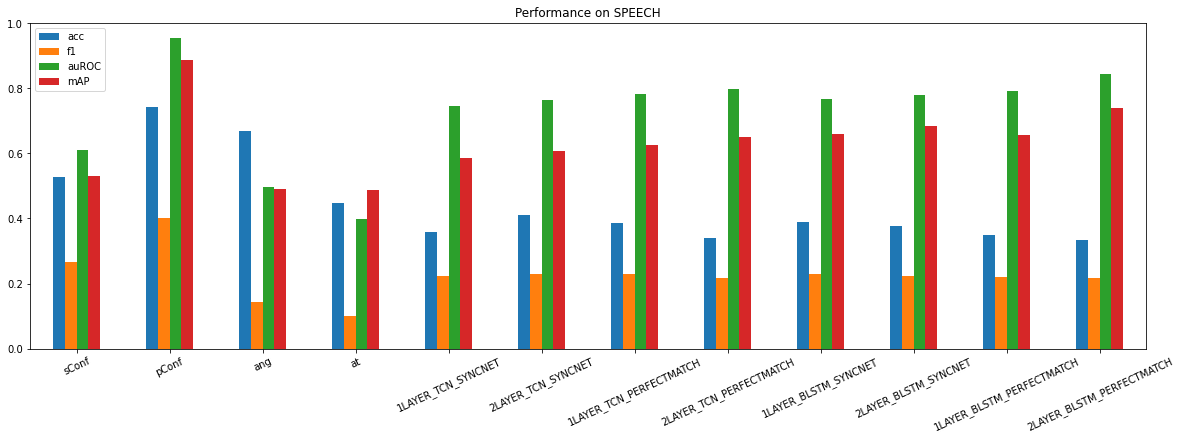

Range is -0.893, -0.278 and support is 132385


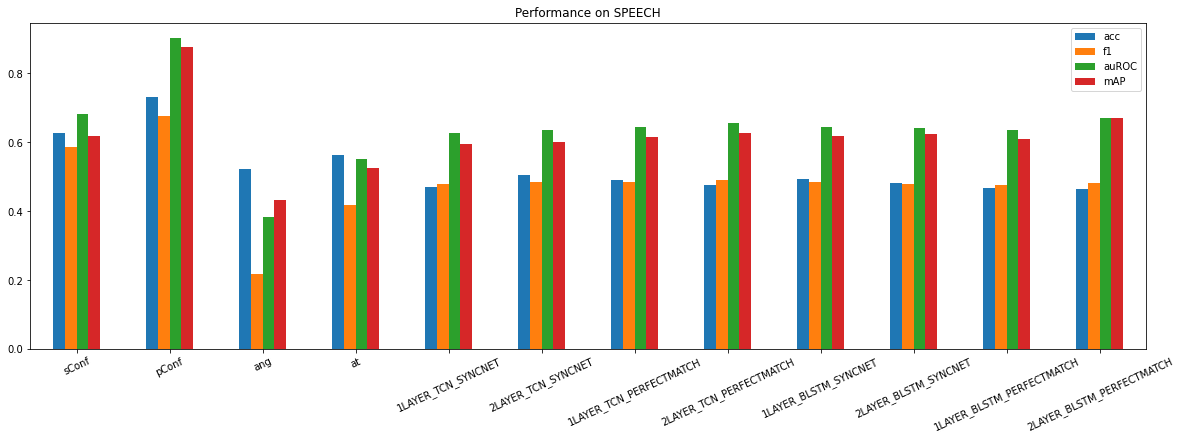

Range is -0.278, 0.338 and support is 1233026


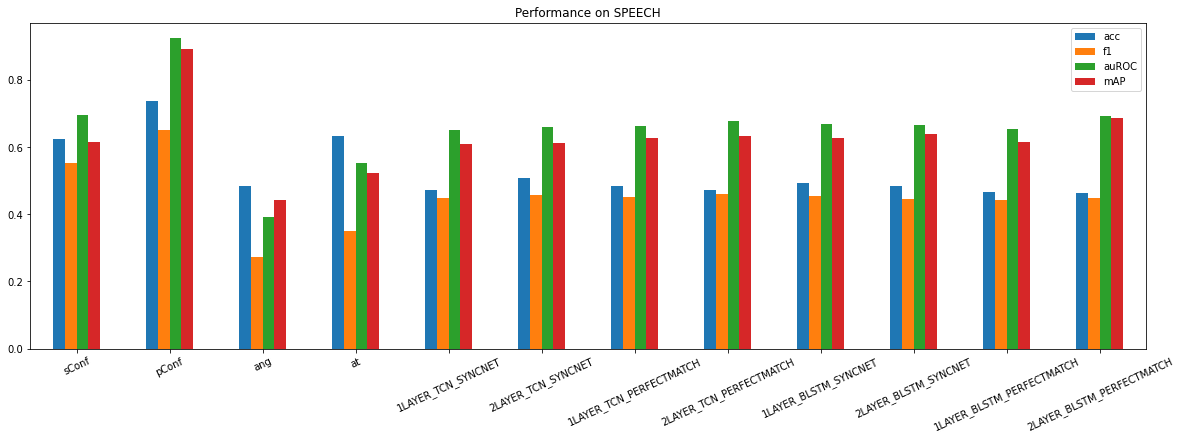

Range is 0.338, 0.953 and support is 106673


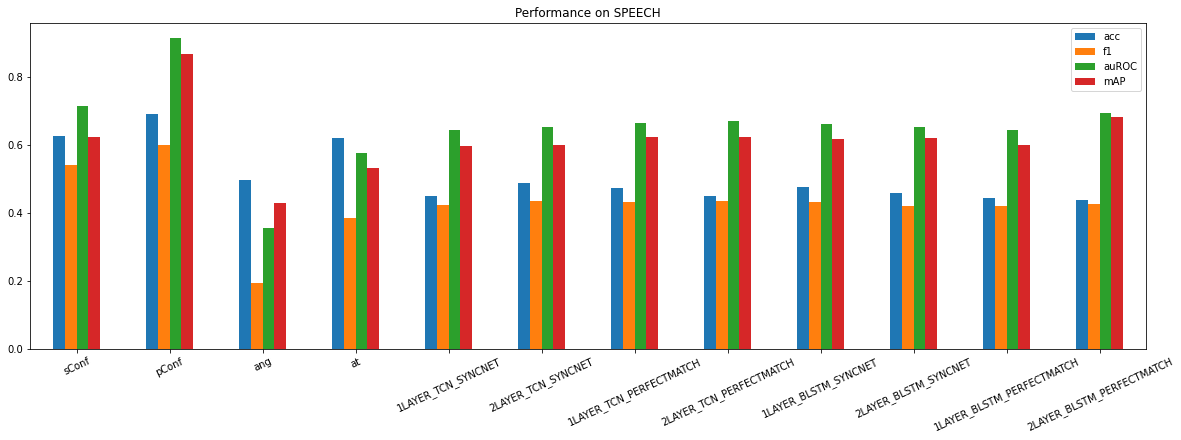

Range is 0.953, 1.569 and support is 512


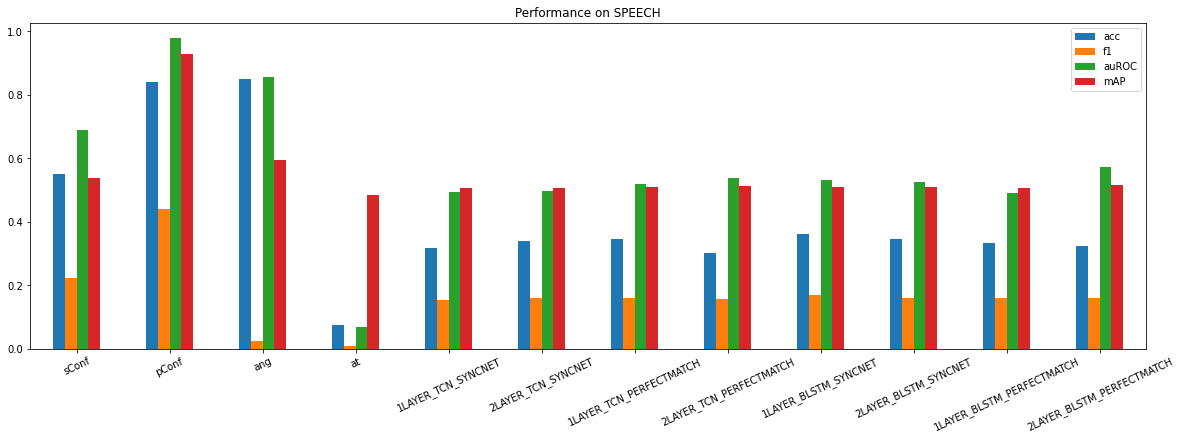

In [85]:
# full_df["pose_Rx"].plot.hist()
# full_df["pose_Ry"].plot.hist()
num_windows=5

for r in ["pose_Rx", "pose_Ry"]:
    print(r, "range", min(full_df[r]),max(full_df[r]))
    window = (max(full_df[r]) - min(full_df[r]))/num_windows
    
    for i in range(num_windows):
        rmin = min(full_df[r]) + window * i
        rmax = min(full_df[r]) + window * (i+1)
        sub_df = full_df[(full_df[r]>=rmin) & (full_df[r]<rmax)]
        
        print(f"Range is {rmin:.3f}, {rmax:.3f} and support is {len(sub_df)}")
        s = score_df(sub_df, label="SPEECH", print_df=False, plot=True)
        
#         print("\t\t\t\t\t\t",[f"{k}: {v:.3f}" for k,v, in s["sConf"].items()])


# Old - Ignore

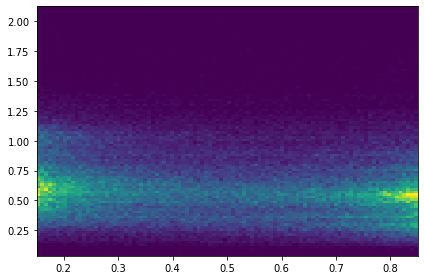

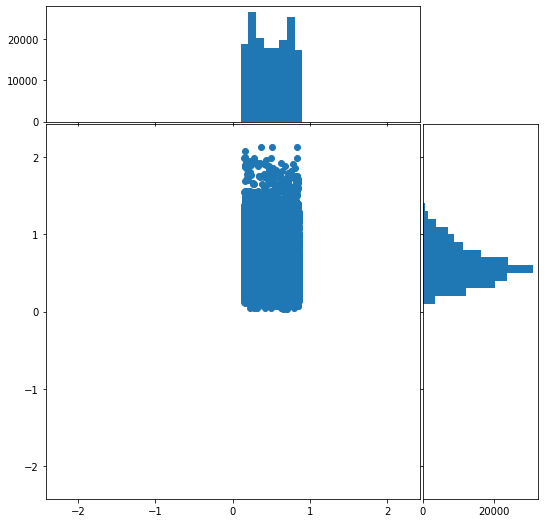

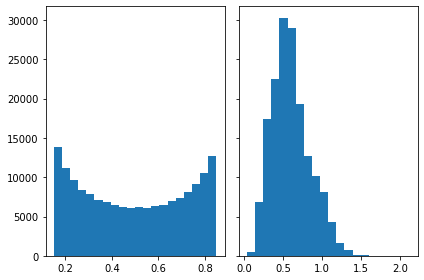

In [73]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

def double_scatter(x,y):    
    fig, ax = plt.subplots(tight_layout=True)
    hist = ax.hist2d(x, y, bins=100)
    plt.show()
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005


    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    # use the previously defined function
    scatter_hist(x, y, ax, ax_histx, ax_histy)

    plt.show()

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    n_bins=20
    # We can set the number of bins with the `bins` kwarg
    axs[0].hist(x, bins=n_bins)
    axs[1].hist(y, bins=n_bins)
    plt.show()
    
d=(all_confidences[:,1]>=0.15) & (all_confidences[:,1]<=0.85)
x = all_confidences[d,1]
y=avg_ang[d]
double_scatter(x,y)